# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice_10():
    dice_rolls=[random.randint(1,6) for roll in range(32)]
    return pd.DataFrame({'roll outcomes':dice_rolls})
df_roll=roll_dice_10()
df_roll

,roll outcomes
0,3
1,1
2,6
3,5
4,4
5,4
6,4
7,6
8,4
9,3


#### 2.- Plot the results sorted by value.

In [5]:
# your code here
df_roll.dtypes

roll outcomes    int64
dtype: object

In [21]:
df_roll_sorted=df_roll.sort_values(by='roll outcomes').reset_index(drop=True)
df_roll_sorted


,roll outcomes
0,1
1,1
2,1
3,1
4,1
5,1
6,2
7,2
8,2
9,2


<AxesSubplot:>

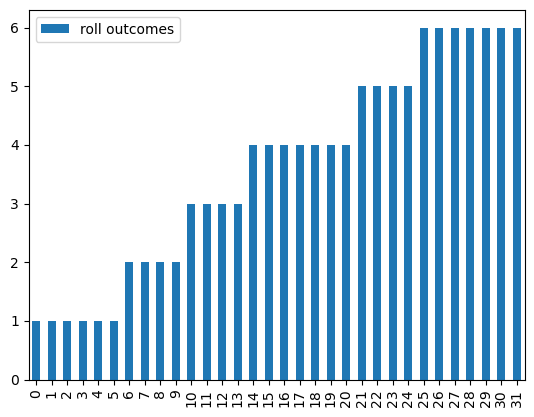

In [26]:
df_roll_sorted.plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='roll outcomes'>

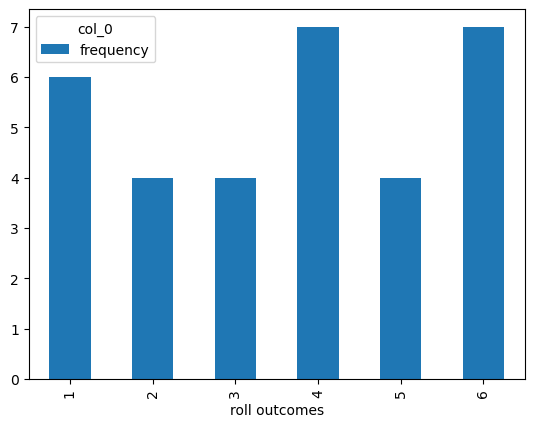

In [29]:
# your code here
#df_roll.pivot(index='roll outcome',columns='frequency', values = 'roll outcome', aggfunc='count')
def frequency_dist(df_roll, col='roll outcomes'):
    df_roll_freq=pd.crosstab(index=df_roll[col],columns='frequency', values = df_roll[col], aggfunc='count')
    return df_roll_freq
df_roll_freq=frequency_dist(df_roll, col='roll outcomes')

df_roll_freq.plot(kind='bar')

In [ ]:
"""
your comments here

this plot condenses the information from the plot above, plotting frequency of each out come. Where as above it plots every outcom
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [101]:
# your code here
#def dice_rolls_mean():
def mean_rolls(df_roll, col='roll outcomes'):
    sum_of_rolls=df_roll[col].sum()
    num_of_rolls=df_roll[col].count()
    roll_mean=sum_of_rolls/num_of_rolls
    return (f'the mean observed outcome = {roll_mean}')

mean_rolls(df_roll, col= 'roll outcomes')

'the mean observed outcome = 3.3'

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [103]:
# your code here
def median_from_frequency(df_roll, col='roll outcomes'):
    
    df_roll_freq=pd.crosstab(index=df_roll[col],columns='frequency', values = df_roll[col], aggfunc='count')
    df_roll_freq.columns

    freq_x_roll=0
    sum_num_rolls=0

    for index, row in df_roll_freq.iterrows():
        freq_x_roll+=(index*row)
        sum_num_rolls+=row
    roll_median=int(freq_x_roll)/int(sum_num_rolls)
    return (f'the median as calculated by frequency table is {roll_median}')

median_from_frequency(df_roll, col='roll outcomes')

'the median as calculated by frequency table is 3.3'

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [130]:
# your code here
# median is the middle value (when odd number of values),
    # or if even, it is the sum of the two middle values / 2
    #sort values in order
def median_function(df_roll, col='roll outcomes'):
    df_sorted=df_roll.sort_values(by=col).reset_index(drop=True)
    #display(df_sorted) #used to check median and sort out indexing issue
    num_of_rolls=int(df_roll.count())
        #if function to define if count is even or odd
                #if odd, devide count by two and round up, - 1 and then use this as index to find value
                # can thus simply round down to simplify steps
    if num_of_rolls % 2!=0:
        mid_index=np.floor(num_of_rolls/2)
        middle_val=int(df_sorted.loc[mid_index])

            #if even, divide count by 2 to get first index, plus 1 to get secon index, 
            #then minus 1 from both to give index of middle values
            # thus can use first number and number below (avoiding need to subtract one from both)
    else:
        mid_index_1=np.floor(num_of_rolls/2)
        mid_index_2= mid_index_1-1
        # add two middle values and divide by two
        middle_val=int((int(df_sorted.loc[mid_index_1])+(df_sorted.loc[mid_index_2]))/2)
    return (f'median is {middle_val}')
    
median_function(df_roll, col='roll outcomes')


'median is 4'

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [132]:
# your code here
def quartile_function(df_roll, col='roll outcomes'):
    df_sorted=df_roll.sort_values(by=col).reset_index(drop=True)
    display(df_sorted) #used to check median and sort out indexing issue
    num_of_rolls=int(df_roll.count())
        #if function to define if count is even or odd
                #if odd, devide count by two and round up, - 1 and then use this as index to find value
                # can thus simply round down to simplify steps
#for Q1
    if (num_of_rolls/2) % 2!=0:
        Q1_mid_index_1=np.floor(num_of_rolls/4)
        Q1_val=int(df_sorted.loc[Q1_mid_index_1])

            #if even, divide count by 2 to get first index, plus 1 to get secon index, 
            #then minus 1 from both to give index of middle values
            # thus can use first number and number below (avoiding need to subtract one from both)
    else:
        Q1_mid_index_1=int(np.floor(num_of_rolls/4))
        mid_index_2= Q1_mid_index_1-1
        # add two middle values and divide by two
        Q1_val=int(((df_sorted.loc[Q1_mid_index_1])+(df_sorted.loc[mid_index_2]))/2)

#for Q3
    if (num_of_rolls/2) % 2!=0:
                    mid_index_1=np.floor((num_of_rolls/4)*3)
                    Q3_val=int(df_sorted.loc[mid_index_1])

            #if even, divide count by 2 to get first index, plus 1 to get secon index, 
            #then minus 1 from both to give index of middle values
            # thus can use first number and number below (avoiding need to subtract one from both)
    else:
        mid_index_1=np.floor((num_of_rolls/4)*3)
        mid_index_2= mid_index_1-1
        # add two middle values and divide by two
        Q3_val=int(((df_sorted.loc[mid_index_1])+(df_sorted.loc[mid_index_2]))/2)
    
    return print(f'''Lower quartile is {Q1_val}, upper quartile is {Q3_val}
    Q1 index = {Q1_mid_index_1}
    Q3 index = {mid_index_1}''')
    
quartile_function(df_roll, col='roll outcomes')

,roll outcomes
0,1
1,1
2,1
3,2
4,2
5,3
6,3
7,3
8,3
9,3


Lower quartile is 3, upper quartile is 5
    Q1 index = 8
    Q3 index = 24.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:xlabel='roll'>

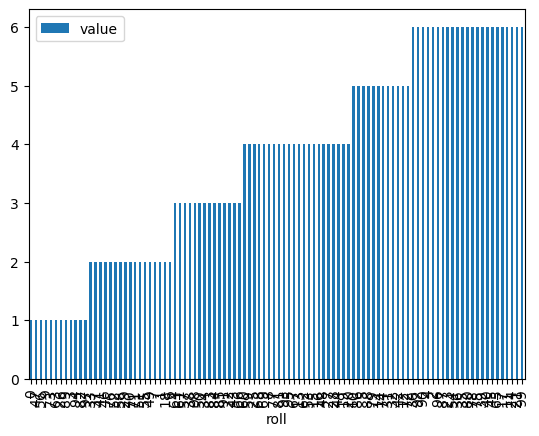

In [42]:
# your code here
roll_100_df=pd.read_csv('roll_the_dice_hundred.csv')
roll_100_df.sort_values(by='value')
roll_100_df.columns
roll_100_df=roll_100_df.drop(['Unnamed: 0'], axis='columns')
roll_100_df.sort_values('value').plot(y='value',x='roll',kind='bar')

In [ ]:
"""
your comments here 
not yet solved as need to do plots

shows fairly even distribution in outcomes over 100 rolls
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [137]:
# your code here
mean_rolls(roll_100_df,col='value')

'the mean observed outcome = 3.74'

#### 3.- Now, calculate the frequency distribution.


In [43]:
# your code here
freq_100_df=frequency_dist(roll_100_df,col='value')

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value'>

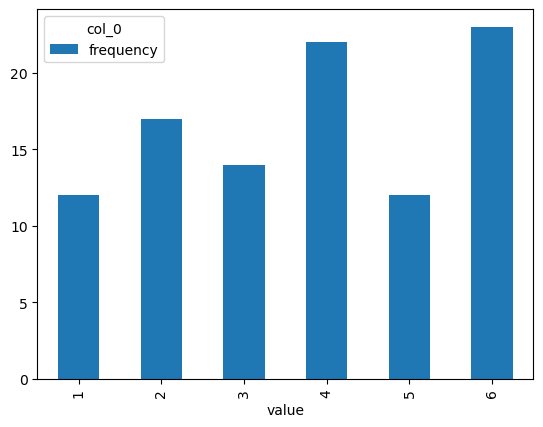

In [44]:
# your code here
freq_100_df.plot(kind='bar')

In [ ]:
"""
your comments here
looks fairly discreet in shape
not sure how to connet the mean, 
just slightly right of 3 where there is more weight in the graph(more frequently rolled faces of the dice)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:xlabel='value'>

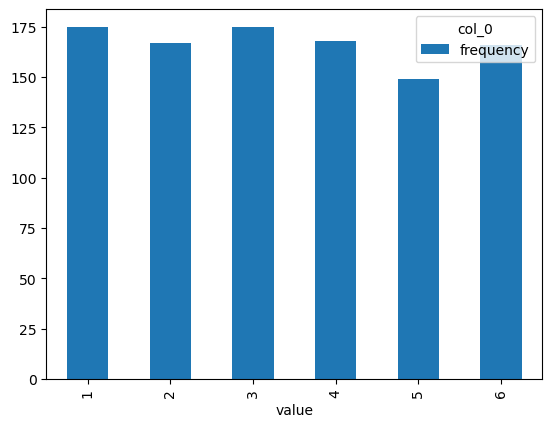

In [46]:
# your code here

roll_1000_df=pd.read_csv('roll_the_dice_thousand.csv')
freq_1000_df=frequency_dist(roll_1000_df,col='value')
freq_1000_df.sort_values('value').plot(kind='bar')

In [ ]:
"""
your comments here
more equal distribution in the number of times each face of the dice rolled

distribution more even between all outcomes
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [142]:
# your code here
age_1_df=pd.read_csv('ages_population.csv')
age_1_df.head()
frequency_dist(age_1_df, col='observation')

col_0,frequency
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [143]:
# your code here

age_2_df=pd.read_csv('ages_population2.csv')
age_2_df.head()
frequency_dist(age_2_df, col='observation')

col_0,frequency
observation,
19.0,3
20.0,13
21.0,17
22.0,35
23.0,41
24.0,78
25.0,98
26.0,120
27.0,125


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [144]:
# your code here

age_3_df=pd.read_csv('ages_population3.csv')
age_3_df.head()
frequency_dist(age_1_df, col='observation')

col_0,frequency
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""